# Data Preprocessing

In [1]:
# Importing the libraries

# Для обробки даних
import numpy as np
import pandas as pd

# Для візуалізації
import matplotlib.pyplot as plt
import seaborn as sns

# Для моделювання та тестування
import sklearn
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold


In [2]:
# Importing the dataset
df = pd.read_csv('data_di.csv', sep=',')

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Заменяю знак "?" на идентификатор пропущенного значения.

In [5]:
df = df.replace('?',np.NaN)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Делаю проверку на количество уникальных значений по переменным

In [6]:
df.apply(lambda x: len(x.unique()))
#df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

Удаляю переменные, которые сожержат большое кол-во уникальныз значений и являются неинформативными.

In [7]:
df = df.drop(['insured_zip','policy_number','incident_location','policy_bind_date','incident_date'], axis='columns', inplace=False)
df.head(5)

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [9]:
# Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
property_damage,360,0.360
police_report_available,343,0.343
collision_type,178,0.178
fraud_reported,0,0.000
insured_education_level,0,0.000
capital-loss,0,0.000
capital-gains,0,0.000
insured_relationship,0,0.000
insured_hobbies,0,0.000
insured_occupation,0,0.000


Произвожу замену пропущенных значений по переменным. Для 'property_damage' и 'police_report_available' отсутствие данных можно заменить значением "NO". 

In [10]:
df['property_damage'].value_counts()

NO     338
YES    302
Name: property_damage, dtype: int64

In [11]:
df['police_report_available'].value_counts()

NO     343
YES    314
Name: police_report_available, dtype: int64

In [12]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [13]:
df['property_damage'].fillna('NO', inplace = True)

In [14]:
df['property_damage'].value_counts()

NO     698
YES    302
Name: property_damage, dtype: int64

In [15]:
df['police_report_available'].fillna('NO', inplace = True)

In [16]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

Для 'collision_type' я решаю для пропущенных данных создать отдельное значение "Unknown"?, а не заменять наиболее частым.

In [17]:
df['collision_type'].fillna('Unknown', inplace = True)

In [18]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Unknown            178
Name: collision_type, dtype: int64

In [19]:
# Re-Cheking Missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
fraud_reported,0,0.0
insured_education_level,0,0.0
incident_type,0,0.0
capital-loss,0,0.0
capital-gains,0,0.0
insured_relationship,0,0.0
insured_hobbies,0,0.0
insured_occupation,0,0.0
insured_sex,0,0.0
auto_year,0,0.0


Вместо переменной 'auto_year', указывающей на год автомобиля, создаю 'auto_age', которая будет указывать на количество лет авто.

In [20]:
df['auto_age'] = 2015 - df['auto_year'] # Deriving the age of the vehicle based on the year value 
df['auto_age'].head()

0    11
1     8
2     8
3     1
4     6
Name: auto_age, dtype: int64

In [21]:
# Features distribution
#import seaborn as sns
#sns.set()
#sns.pairplot(df, size = 4.5)
#plt.show();

In [22]:
# Log Transformations for Skewed Distributions
#df[[]] = np.log(df[[]])

#import seaborn as sns
#sns.set()
#sns.pairplot(df)

In [23]:
# Function Outliers
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

In [24]:
# Outliers
df = outliers(df)
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,auto_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.476176,1.091898e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7397.773749,37928.950000,2005.103000,9.897000
std,115.113174,9.140287,611.864673,243.570287,2.266996e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4818.993582,18886.252893,6.015861,6.015861
min,0.000000,19.000000,500.000000,523.903965,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,5.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,10.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,15.000000
max,479.000000,64.000000,2000.000000,1987.807651,7.993220e+06,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,21873.748536,79560.000000,2015.000000,20.000000


In [25]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,auto_age
0,328,48,OH,250/500,1000,1406.91,0.0,MALE,MD,craft-repair,...,YES,71610,6510,13020.0,52080,Saab,92x,2004,Y,11
1,228,42,IN,250/500,2000,1197.22,5000000.0,MALE,MD,machine-op-inspct,...,NO,5070,780,780.0,3510,Mercedes,E400,2007,Y,8
2,134,29,OH,100/300,2000,1413.14,5000000.0,FEMALE,PhD,sales,...,NO,34650,7700,3850.0,23100,Dodge,RAM,2007,N,8
3,256,41,IL,250/500,2000,1415.74,6000000.0,FEMALE,PhD,armed-forces,...,NO,63400,6340,6340.0,50720,Chevrolet,Tahoe,2014,Y,1
4,228,44,IL,500/1000,1000,1583.91,6000000.0,MALE,Associate,sales,...,NO,6500,1300,650.0,4550,Accura,RSX,2009,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0.0,FEMALE,Masters,craft-repair,...,NO,87200,17440,8720.0,61040,Honda,Accord,2006,N,9
996,285,41,IL,100/300,1000,1436.79,0.0,FEMALE,PhD,prof-specialty,...,NO,108480,18080,18080.0,72320,Volkswagen,Passat,2015,N,0
997,130,34,OH,250/500,500,1383.49,3000000.0,FEMALE,Masters,armed-forces,...,YES,67500,7500,7500.0,52500,Suburu,Impreza,1996,N,19
998,458,62,IL,500/1000,2000,1356.92,5000000.0,MALE,Associate,handlers-cleaners,...,YES,46980,5220,5220.0,36540,Audi,A5,1998,N,17


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   float64
 7   insured_sex                  1000 non-null   object 
 8   insured_education_level      1000 non-null   object 
 9   insured_occupation           1000 non-null   object 
 10  insured_hobbies              1000 non-null   object 
 11  insured_relationship         1000 non-null   object 
 12  capital-gains                1000 non-null   int64  
 13  capital-loss       

In [27]:
# Cheking categorical data
dfs = df[['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
          'insured_hobbies','insured_relationship','incident_type','collision_type',
          'incident_severity','authorities_contacted','incident_state','incident_city','property_damage',
          'police_report_available','auto_make','auto_model','fraud_reported']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype,
                "mode": dfs[column].mode
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type,mode
13,property_damage,2,"[YES, NO]",object,<bound method Series.mode of 0 YES\n1 ...
0,policy_state,3,"[OH, IN, IL]",object,<bound method Series.mode of 0 OH\n1 ...
1,policy_csl,3,"[250/500, 100/300, 500/1000]",object,<bound method Series.mode of 0 250/500\n...
14,police_report_available,2,"[YES, NO]",object,<bound method Series.mode of 0 YES\n1 ...
2,insured_sex,2,"[MALE, FEMALE]",object,<bound method Series.mode of 0 MALE\n1 ...
6,insured_relationship,6,"[husband, other-relative, own-child, unmarried...",object,<bound method Series.mode of 0 hus...
4,insured_occupation,14,"[craft-repair, machine-op-inspct, sales, armed...",object,<bound method Series.mode of 0 craft...
5,insured_hobbies,20,"[sleeping, reading, board-games, bungie-jumpin...",object,<bound method Series.mode of 0 slee...
3,insured_education_level,7,"[MD, PhD, Associate, Masters, High School, Col...",object,<bound method Series.mode of 0 MD\...
7,incident_type,4,"[Single Vehicle Collision, Vehicle Theft, Mult...",object,<bound method Series.mode of 0 Single Veh...


Кодирую категориальные переменные с помощью среднего целевого значения. Изначально делала это простым способом, но в таком случае значимыми переменными в базовой модели являются всего 2,точность не намного, но ниже 

In [28]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [29]:
df['fraud_reported'] = df['fraud_reported'].replace(('Y','N'),(0,1))

In [30]:
df[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
0,NO,0.757880
1,YES,0.741722


In [31]:
df['property_damage'] = df['property_damage'].replace(('NO','YES'),(0.76,0.74))
df['property_damage'].value_counts()

0.76    698
0.74    302
Name: property_damage, dtype: int64

In [32]:
df[['policy_state','fraud_reported']].groupby(['policy_state'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_state,fraud_reported
0,IL,0.772189
1,IN,0.745161
2,OH,0.741477


In [33]:
df['policy_state'] = df['policy_state'].replace(('IL','IN','OH'),(0.77,0.745,0.74))

In [34]:
df[['policy_csl','fraud_reported']].groupby(['policy_csl'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,policy_csl,fraud_reported
2,500/1000,0.783333
0,100/300,0.742120
1,250/500,0.737892


In [35]:
df['policy_csl'] = df['policy_csl'].replace(('500/1000','100/300','250/500'),(0.78,0.74,0.737))

In [36]:
df[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,police_report_available,fraud_reported
1,YES,0.770701
0,NO,0.744898


In [37]:
df['police_report_available'] = df['police_report_available'].replace(('NO','YES'),(0.74,0.77))

In [38]:
df[['insured_sex','fraud_reported']].groupby(['insured_sex'], as_index = False).mean().sort_values(
    by = 'fraud_reported', ascending = False)

,insured_sex,fraud_reported
0,FEMALE,0.765363
1,MALE,0.738661


In [39]:
df['insured_sex'] = df['insured_sex'].replace(('FEMALE','MALE'),(0.77,0.74))

In [40]:
df[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_relationship,fraud_reported
0,husband,0.794118
3,own-child,0.786885
4,unmarried,0.758865
1,not-in-family,0.741379
5,wife,0.729032
2,other-relative,0.706215


In [41]:
df['insured_relationship'] = df['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.79,0.786,0.76,0.74,0.73,0.706))

In [42]:
df[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_occupation,fraud_reported
7,other-service,0.830986
8,priv-house-serv,0.830986
0,adm-clerical,0.830769
5,handlers-cleaners,0.796296
9,prof-specialty,0.788235
10,protective-serv,0.777778
6,machine-op-inspct,0.763441
1,armed-forces,0.753623
11,sales,0.723684
12,tech-support,0.717949


In [43]:
df['insured_occupation'] = df['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.83, 0.83,0.83, 0.796,0.788,0.77,0.76,0.75,0.72,0.717,
                                                          0.708,0.70,0.698,0.63))

In [44]:
df[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_hobbies,fraud_reported
4,camping,0.909091
11,kayaking,0.907407
9,golf,0.890909
7,dancing,0.883721
3,bungie-jumping,0.839286
12,movies,0.836364
1,basketball,0.823529
8,exercise,0.807018
17,sleeping,0.804878
18,video-games,0.800000


In [45]:
df['insured_hobbies'] = df['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.91, 0.907,
                0.89, 0.88,0.84,0.836,0.82,0.807,0.805,0.80,0.78,0.77,0.769,0.73,0.73,0.72,0.708,0.698,0.26,0.17))

In [46]:
df[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,insured_education_level,fraud_reported
5,Masters,0.776224
2,High School,0.775000
0,Associate,0.765517
3,JD,0.739130
1,College,0.737705
4,MD,0.736111
6,PhD,0.736000


In [47]:
df['insured_education_level'] = df['insured_education_level'].replace(('Masters', 'High School','Associate',
                                        'JD','College', 'MD','PhD'),(0.776,0.77,0.766,0.74,0.737,0.736,0.736))

In [48]:
df[['incident_type','fraud_reported']].groupby(['incident_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_type,fraud_reported
3,Vehicle Theft,0.914894
1,Parked Car,0.904762
0,Multi-vehicle Collision,0.727924
2,Single Vehicle Collision,0.709677


In [49]:
df['incident_type'] = df['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision',
                                'Single Vehicle Collision'),(0.91, 0.90, 0.73,0.71))

In [50]:
df[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_state,fraud_reported
6,WV,0.820276
1,NY,0.778626
5,VA,0.772727
3,PA,0.733333
4,SC,0.705645
0,NC,0.690909
2,OH,0.565217


In [51]:
df['incident_state'] = df['incident_state'].replace(('WV','NY','VA','PA','SC','NC','OH'),
                                                        (0.82,0.78,0.77,0.73,0.705,0.69,0.565))


In [52]:
df[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_severity,fraud_reported
3,Trivial Damage,0.933333
1,Minor Damage,0.892655
2,Total Loss,0.871429
0,Major Damage,0.394928


In [53]:
df['incident_severity'] = df['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                                              'Major Damage'),(0.93,0.89,0.87,0.39))

In [54]:
df[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,incident_city,fraud_reported
4,Northbrook,0.778689
5,Riverwood,0.776119
3,Northbend,0.765517
6,Springfield,0.757962
2,Hillsdale,0.751773
1,Columbus,0.738255
0,Arlington,0.710526


In [55]:
df['incident_city'] = df['incident_city'].replace(('Northbrook','Riverwood','Northbend','Springfield',
                                    'Hillsdale','Columbus','Arlington'),(0.778,0.776,0.765,0.757,0.75,0.74,0.71))

In [56]:
df[['collision_type','fraud_reported']].groupby(['collision_type'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,collision_type,fraud_reported
3,Unknown,0.910112
2,Side Collision,0.746377
0,Front Collision,0.724409
1,Rear Collision,0.688356


In [57]:
df['collision_type'] = df['collision_type'].replace(('Unknown','Side Collision', 'Front Collision','Rear Collision'),
                                                        (0.91,0.746,0.724,0.688))

In [58]:
df[['auto_model','fraud_reported']].groupby(['auto_model'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_model,fraud_reported
0,3 Series,0.944444
31,RSX,0.916667
25,Malibu,0.900000
36,Wrangler,0.880952
29,Pathfinder,0.870968
35,Ultima,0.869565
9,Camry,0.857143
11,Corolla,0.850000
8,CRV,0.850000
21,Legacy,0.843750


In [59]:
df['auto_model'] = df['auto_model'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E400',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahoe','C300','ML350','Silverado','X6'),
                (0.95,0.91, 0.90,0.88,0.87,0.86,0.855,0.85,0.85,0.84,0.83,0.81,0.80,0.80,0.78,0.77,0.76,0.75,0.74,
                 0.73,0.72,0.72,0.71,0.71,0.71,0.71,0.70,0.70,0.69,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.60,0.59,0.56))

In [60]:
df['auto_model'].value_counts()

0.710    112
0.720     55
0.800     45
0.700     44
0.670     43
0.880     42
0.850     40
0.830     37
0.730     37
0.780     36
0.650     32
0.840     32
0.870     31
0.900     30
0.855     28
0.810     27
0.630     27
0.740     27
0.760     25
0.750     24
0.620     24
0.690     23
0.860     23
0.640     22
0.590     22
0.600     20
0.610     18
0.950     18
0.560     16
0.660     15
0.770     13
0.910     12
Name: auto_model, dtype: int64

In [61]:
df[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_make,fraud_reported
7,Jeep,0.835821
9,Nissan,0.820513
12,Toyota,0.814286
0,Accura,0.808824
10,Saab,0.775000
11,Suburu,0.762500
4,Dodge,0.750000
6,Honda,0.745455
3,Chevrolet,0.723684
2,BMW,0.722222


In [62]:
df['auto_make'] = df['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu',
                                'Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                              (0.84,0.82,0.81,0.80,0.775,0.76,0.75,0.745,0.72,0.72,0.72,0.695,0.694,0.66))

In [63]:
df[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,authorities_contacted,fraud_reported
2,None,0.934066
4,Police,0.791096
1,Fire,0.730942
0,Ambulance,0.709184
3,Other,0.681818


In [64]:
df['authorities_contacted'] = df['authorities_contacted'].replace(('None','Police','Fire','Ambulance','Other'),
                                                                      (0.93,0.79,0.73,0.71,0.68))

Записываю в переменную 'auto_year' значения 'auto_age', зачем удаляюЗаписываю в переменную 'auto_year' значения 'auto_age', зачем удаляюЗаписываю в переменную 'auto_year' значения 'auto_age', зачем удаляю 'auto_age'.

In [65]:
df['auto_year'] = df['auto_age']

In [66]:
df = df.drop(['auto_age'], axis='columns', inplace=False)

In [67]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,0.740,0.737,1000,1406.91,0.0,0.74,0.736,0.700,...,2,0.77,71610,6510,13020.0,52080,0.775,0.71,11,0
1,228,42,0.745,0.737,2000,1197.22,5000000.0,0.74,0.736,0.760,...,0,0.74,5070,780,780.0,3510,0.660,0.74,8,0
2,134,29,0.740,0.740,2000,1413.14,5000000.0,0.77,0.736,0.720,...,3,0.74,34650,7700,3850.0,23100,0.750,0.67,8,1
3,256,41,0.770,0.737,2000,1415.74,6000000.0,0.77,0.736,0.750,...,2,0.74,63400,6340,6340.0,50720,0.720,0.62,1,0
4,228,44,0.770,0.780,1000,1583.91,6000000.0,0.74,0.766,0.720,...,1,0.74,6500,1300,650.0,4550,0.800,0.91,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,0.740,0.780,1000,1310.80,0.0,0.77,0.776,0.700,...,1,0.74,87200,17440,8720.0,61040,0.745,0.77,9,1
996,285,41,0.770,0.740,1000,1436.79,0.0,0.77,0.736,0.788,...,3,0.74,108480,18080,18080.0,72320,0.720,0.72,0,1
997,130,34,0.740,0.737,500,1383.49,3000000.0,0.77,0.776,0.750,...,3,0.77,67500,7500,7500.0,52500,0.760,0.70,19,1
998,458,62,0.770,0.780,2000,1356.92,5000000.0,0.74,0.766,0.796,...,1,0.77,46980,5220,5220.0,36540,0.695,0.65,17,1


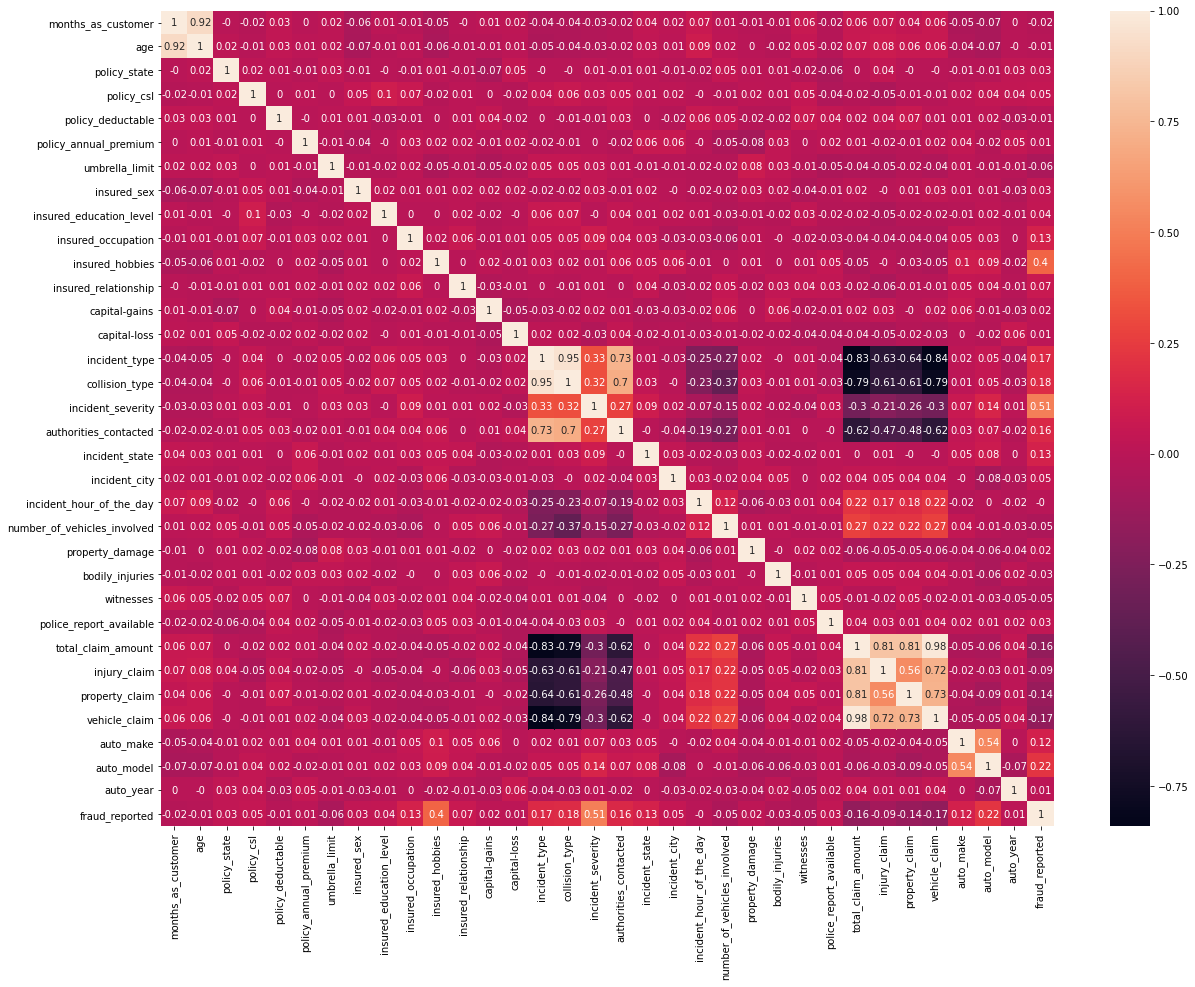

In [68]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr().round(2)
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, annot=True)
plt.show()

In [69]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [70]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({1: 753, 0: 247})


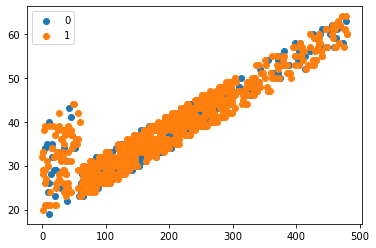

In [71]:
# scatter plot of examples by class label
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
for label, _ in counter.items():
 row_ix = where(y == label)[0]
 pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

# SMOTE

In [72]:
#pip install -U imbalanced-learn

In [73]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority',random_state=10)
X_sm, y_sm = smote.fit_resample(X, y)

In [74]:
from collections import Counter
counter = Counter(y_sm)
print(counter)

Counter({0: 753, 1: 753})


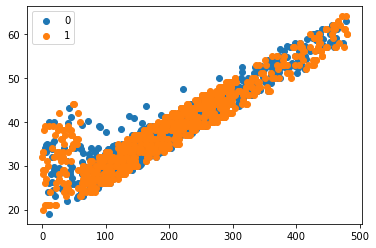

In [75]:
# scatter plot of examples by class label
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
for label, _ in counter.items():
 row_ix = where(y_sm == label)[0]
 pyplot.scatter(X_sm[row_ix, 0], X_sm[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [76]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=13)

In [77]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)

In [78]:
pd.Series(y_train).value_counts()

0    610
1    594
dtype: int64

In [79]:
pd.Series(y_test).value_counts()

1    159
0    143
dtype: int64

# Logistic Regression

Логістична регресія на усіх змінних

In [80]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 13).fit(X_train, y_train)

In [81]:
# Predicting the Test set results
y_pred = lr.predict(X_test)
lr.score(X_test,y_test)

0.8807947019867549

In [82]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[129  14]
 [ 22 137]]


In [83]:
Error_rate = (22+14)/(302)
Error_rate

0.11920529801324503

In [84]:
Se = 137/(137+22)
Se

0.8616352201257862

In [85]:
Sp = 129/(129+14)
Sp

0.9020979020979021

LogisticRegression: ROC AUC=0.921


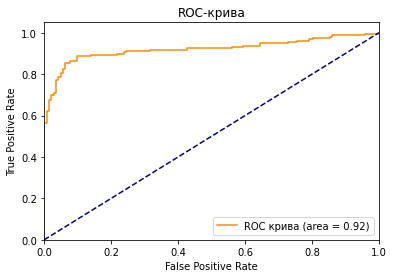

In [87]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt
lr_probs = lr.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
fpr, tpr, treshold = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title( 'ROC-крива')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

Логістична регресія на відібраних змінних

In [88]:
# Baseline model
import statsmodels.api as sm
lr = sm.Logit(y_train, X_train).fit()
print(lr.summary2())

         Current function value: 0.318380
         Iterations: 35


C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.541      
Dependent Variable: y                AIC:              832.6600   
Date:               2021-11-25 07:24 BIC:              1000.7423  
No. Observations:   1204             Log-Likelihood:   -383.33    
Df Model:           32               LL-Null:          -834.44    
Df Residuals:       1171             LLR p-value:      6.2602e-169
Converged:          0.0000           Scale:            1.0000     
No. Iterations:     35.0000                                       
-------------------------------------------------------------------
         Coef.     Std.Err.     z     P>|z|     [0.025      0.975] 
-------------------------------------------------------------------
x1       -0.1713     0.2580  -0.6640  0.5067     -0.6770     0.3344
x2        0.4740     0.2619   1.8096  0.0704     -0.0394     0.9874
x3        0.1585     0.0987   1.6061  0.1082     -0.0349     0.3520
x4        0.216

In [89]:
# Automatic Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
estimator=LogisticRegression(random_state=123)
selector=RFECV(estimator, step=1)
selector=selector.fit(X_train, y_train)
print(selector.n_features_)
print(selector.support_)
print(selector.ranking_)

10
[False  True False  True False False False False False  True  True  True
 False False  True  True  True False False False False False False False
  True False False False False False False  True False]
[12  1 10  1 16 15  6 22  4  1  1  1 14  8  1  1  1 13  7 21  9  5 20 23
  1 19  2  3 18 17 11  1 24]


In [90]:
# Selected Features
selected_columns=[]
for i in range(len(X_train[0])):
    if selector.support_[i]==1:
        selected_columns.append(i)
print(selected_columns)
print('№\tIndex\tFeature')
i=0
for column in selected_columns:
    print(str(i)+'\t'+str(column)+'\t'+str(df.columns[column]))
    i=i+1

[1, 3, 9, 10, 11, 14, 15, 16, 24, 31]
№	Index	Feature
0	1	age
1	3	policy_csl
2	9	insured_occupation
3	10	insured_hobbies
4	11	insured_relationship
5	14	incident_type
6	15	collision_type
7	16	incident_severity
8	24	witnesses
9	31	auto_model


In [91]:
# p-value < 3% Features
bas_X_train = X_train[:,[3,8,9,10,11,14,15,16,21,24,31]]
bas_X_test = X_test[:,[3,8,9,10,11,14,15,16,21,24,31]]

In [92]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
bas = LogisticRegression(random_state = 13).fit(bas_X_train, y_train)

In [93]:
# Predicting the Test set results
y_bas_pred = bas.predict(bas_X_test)
bas.score(bas_X_test,y_test)

0.8841059602649006

In [94]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_bas_pred)
print(cm)

[[130  13]
 [ 22 137]]


In [95]:
Error_rate = (22+13)/(302)
Error_rate

0.11589403973509933

In [96]:
Se = 137/(137+22)
Se

0.8616352201257862

In [97]:
Sp = 130/(130+13)
Sp

0.9090909090909091

LogisticRegression: ROC AUC=0.923


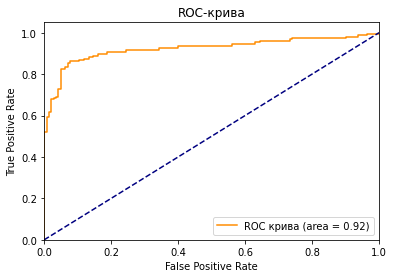

In [98]:
bas_probs = bas.predict_proba(bas_X_test)
bas_probs = bas_probs[:, 1]
bas_auc = roc_auc_score(y_test, bas_probs)
print('LogisticRegression: ROC AUC=%.3f' % (bas_auc))
fpr, tpr, treshold = roc_curve(y_test, bas_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# SVM

SVM на значущих змінних

In [99]:
# Fitting SVM to the Training set (2 variables)
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 10, probability=True).fit(bas_X_train, y_train)

In [100]:
# Predicting the Test set results
svm_pred = svm.predict(bas_X_test)
svm.score(bas_X_test,y_test)

0.9072847682119205

In [101]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_pred)
print(cm)

[[134   9]
 [ 19 140]]


In [102]:
Error_rate = (19+9)/(302)
Error_rate

0.09271523178807947

In [103]:
Se = 140/(140+19)
Se

0.8805031446540881

In [104]:
Sp = 134/(134+9)
Sp

0.9370629370629371

SVM: ROC AUC=0.949


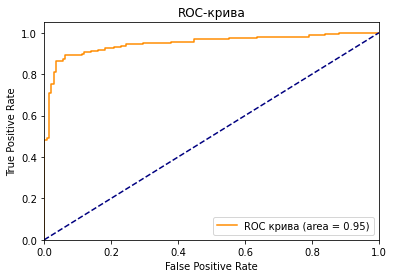

In [105]:
svm_probs = svm.predict_proba(bas_X_test)
# сохраняем вероятности только для положительного исхода
svm_probs = svm_probs[:, 1]
# рассчитываем ROC AUC
svm_auc = roc_auc_score(y_test, svm_probs)
print('SVM: ROC AUC=%.3f' % (svm_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, svm_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange',
         label='ROC крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

SVM на усіх змінних

In [107]:
# Fitting SVM to the Training set (2 variables)
from sklearn.svm import SVC
svm1 = SVC(kernel = 'rbf', random_state = 10, probability=True).fit(X_train, y_train)

In [108]:
# Predicting the Test set results
svm_pred = svm1.predict(X_test)
svm1.score(X_test,y_test)

0.9139072847682119

In [109]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, svm_pred)
print(cm)

[[136   7]
 [ 19 140]]


In [110]:
Error_rate = (19+7)/(302)
Error_rate

0.08609271523178808

In [111]:
Se = 140/(140+19)
Se

0.8805031446540881

In [112]:
Sp = 136/(136+7)
Sp

0.951048951048951

SVM: ROC AUC=0.959


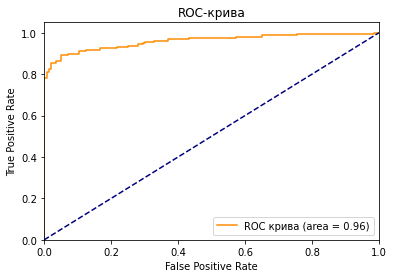

In [113]:
svm1_probs = svm1.predict_proba(X_test)
# сохраняем вероятности только для положительного исхода
svm1_probs = svm1_probs[:, 1]
# рассчитываем ROC AUC
svm1_auc = roc_auc_score(y_test, svm1_probs)
print('SVM: ROC AUC=%.3f' % (svm1_auc))
fpr, tpr, treshold = roc_curve(y_test, svm1_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='ROC крива (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# K-Nearest Neighbors

KNN на значущих змінних

Minimum error:- 0.08940397350993377 at K = 0


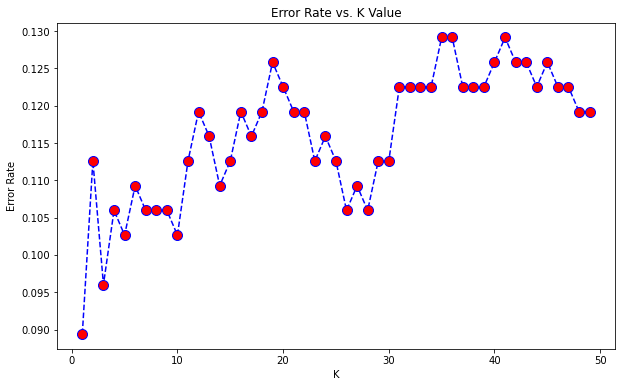

In [115]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
     knn = KNeighborsClassifier(n_neighbors=i)
     knn.fit(bas_X_train,y_train)
     pred_i = knn.predict(bas_X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [116]:
# Fitting K-NN to the Training set (2 variables)
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2).fit(bas_X_train, y_train)

In [117]:
# Predicting the Test set results
knn_pred = knn.predict(bas_X_test)
knn.score(bas_X_test,y_test).round(2)

0.89

In [118]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_pred)
print(cm)

[[138   5]
 [ 27 132]]


In [119]:
Error_rate = (27+5)/(302)
Error_rate

0.10596026490066225

In [120]:
Se = 132/(132+27)
Se

0.8301886792452831

In [121]:
Sp = 138/(138+5)
Sp

0.965034965034965

KNN: ROC AUC=0.953


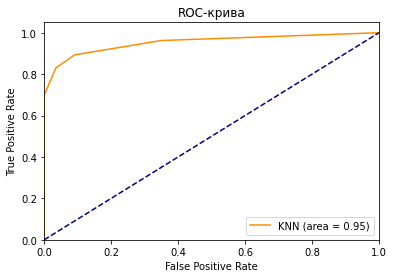

In [122]:
knn_probs = knn.predict_proba(bas_X_test)
knn_probs = knn_probs[:, 1]
knn_auc = roc_auc_score(y_test, knn_probs)
print('KNN: ROC AUC=%.3f' % (knn_auc))
fpr, tpr, treshold = roc_curve(y_test, knn_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

KNN на усіх змінних

Minimum error:- 0.17218543046357615 at K = 0


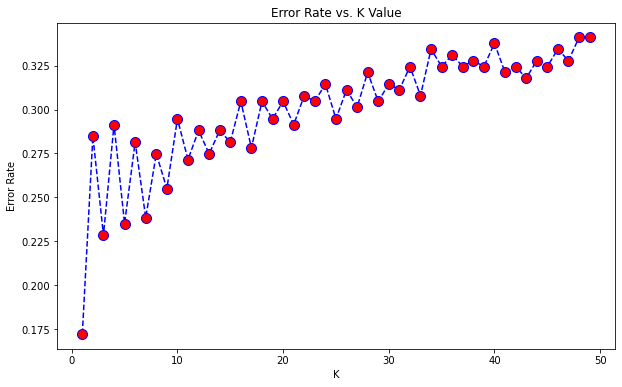

In [123]:
# Optimal K 
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1,50):
     knn1 = KNeighborsClassifier(n_neighbors=i)
     knn1.fit(X_train,y_train)
     pred_i = knn1.predict(X_test)
     error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [124]:
# Fitting K-NN to the Training set (2 variables)
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2).fit(X_train, y_train)

In [125]:
# Predicting the Test set results
knn_pred = knn.predict(X_test)
knn.score(X_test,y_test).round(2)

0.83

In [126]:
knn.score(X_train,y_train).round(3)

1.0

In [127]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, knn_pred)
print(cm)

[[143   0]
 [ 52 107]]


In [129]:
Error_rate = (52+0)/(302)
Error_rate

0.17218543046357615

In [130]:
Se = 107/(107+52)
Se

0.6729559748427673

In [131]:
Sp = 143/(143+0)
Sp

1.0

KNN: ROC AUC=0.907


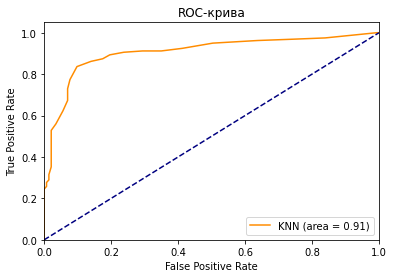

In [132]:
knn1_probs = knn1.predict_proba(X_test)
knn1_probs = knn1_probs[:, 1]
knn1_auc = roc_auc_score(y_test, knn1_probs)
print('KNN: ROC AUC=%.3f' % (knn1_auc))
fpr, tpr, treshold = roc_curve(y_test, knn1_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# Naive Bayes

Naive Bayes на значущих змінних

In [133]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB().fit(bas_X_train, y_train)

In [134]:
# Predicting the Test set results
nb_pred = nb.predict(bas_X_test)
nb.score(bas_X_test,y_test)

0.8509933774834437

In [135]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nb_pred)
print(cm)

[[134   9]
 [ 36 123]]


In [136]:
Error_rate = (36+9)/(302)
Error_rate

0.1490066225165563

In [137]:
Se = 123/(123+36)
Se

0.7735849056603774

In [138]:
Sp = 134/(134+9)
Sp

0.9370629370629371

NB: ROC AUC=0.926


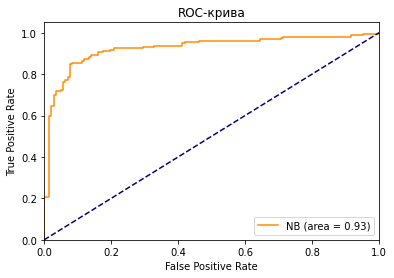

In [139]:
nb_probs = nb.predict_proba(bas_X_test)
nb_probs = nb_probs[:, 1]
nb_auc = roc_auc_score(y_test, nb_probs)
print('NB: ROC AUC=%.3f' % (nb_auc))
fpr, tpr, treshold = roc_curve(y_test, nb_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='NB (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

Naive Bayes на усіх змінних

In [140]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
nb1 = GaussianNB().fit(X_train, y_train)

In [141]:
# Predicting the Test set results
nb1_pred = nb1.predict(X_test)
nb1.score(X_test,y_test)

0.7582781456953642

In [142]:
nb1.score(X_train,y_train)

0.7757475083056479

In [143]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nb1_pred)
print(cm)

[[137   6]
 [ 67  92]]


In [144]:
Error_rate = (67+6)/(302)
Error_rate

0.24172185430463577

In [145]:
Se = 92/(92+67)
Se

0.5786163522012578

In [146]:
Sp = 137/(137+6)
Sp

0.958041958041958

NB: ROC AUC=0.916


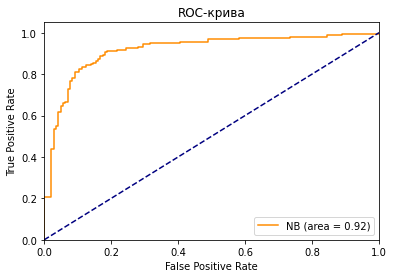

In [147]:
nb1_probs = nb1.predict_proba(X_test)
nb1_probs = nb1_probs[:, 1]
nb1_auc = roc_auc_score(y_test, nb1_probs)
print('NB: ROC AUC=%.3f' % (nb1_auc))
fpr, tpr, treshold = roc_curve(y_test, nb1_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='NB (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# Classification Tree

Classification Tree на значущих змінних

In [148]:
# Function Max Leaf
def max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(bas_X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(bas_X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(bas_X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

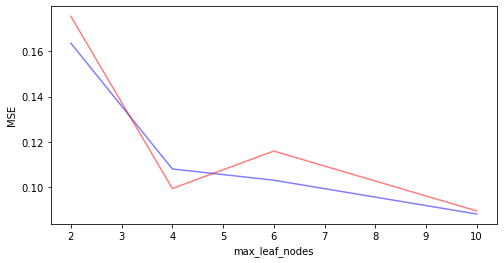

In [149]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [150]:
# Fitting Classification Tree to the Training set (2 variables)
ct = DecisionTreeClassifier(max_leaf_nodes = 4, criterion = 'entropy', random_state = 10).fit(bas_X_train, y_train)

In [151]:
# Predicting the Test set results
ct_pred = ct.predict(bas_X_test)
ct.score(bas_X_test,y_test)

0.9006622516556292

In [152]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ct_pred)
print(cm)

[[137   6]
 [ 24 135]]


In [153]:
Error_rate = (24+6)/(302)
Error_rate

0.09933774834437085

In [154]:
Se = 135/(135+24)
Se

0.8490566037735849

In [155]:
Sp = 137/(137+6)
Sp

0.958041958041958

CT: ROC AUC=0.937


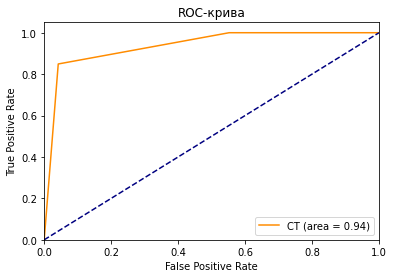

In [156]:
ct_probs = ct.predict_proba(bas_X_test)
ct_probs = ct_probs[:, 1]
ct_auc = roc_auc_score(y_test, ct_probs)
print('CT: ROC AUC=%.3f' % (ct_auc))
fpr, tpr, treshold = roc_curve(y_test, ct_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='CT (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

Classification Tree на усіх змінних

In [157]:
# Function Max Leaf
def max_leaf_nodes(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        ct = DecisionTreeClassifier(max_leaf_nodes = i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, ct.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, ct.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

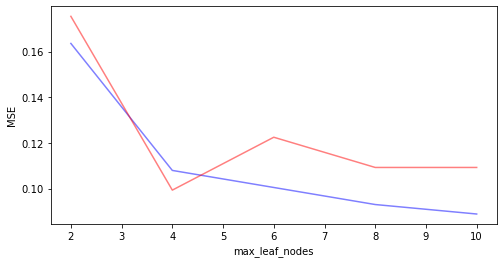

In [158]:
# The optimal number of max_leaf_nodes
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [159]:
# Fitting Classification Tree to the Training set (2 variables)
ct1 = DecisionTreeClassifier(max_leaf_nodes = 4, criterion = 'entropy', random_state = 10).fit(X_train, y_train)

In [160]:
# Predicting the Test set results
ct_pred = ct1.predict(X_test)
ct1.score(X_test,y_test)

0.9006622516556292

In [161]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ct_pred)
print(cm)

[[137   6]
 [ 24 135]]


In [162]:
Error_rate = (24+6)/(302)
Error_rate

0.09933774834437085

In [163]:
Se = 135/(135+24)
Se

0.8490566037735849

In [164]:
Sp = 137/(137+6)
Sp

0.958041958041958

CT: ROC AUC=0.937


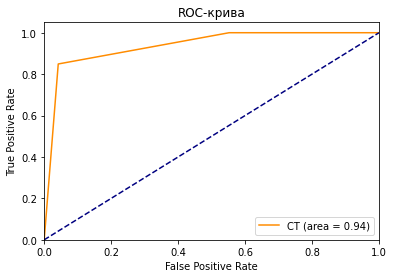

In [165]:
ct1_probs = ct1.predict_proba(X_test)
ct1_probs = ct1_probs[:, 1]
ct1_auc = roc_auc_score(y_test, ct1_probs)
print('CT: ROC AUC=%.3f' % (ct1_auc))
fpr, tpr, treshold = roc_curve(y_test, ct1_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='CT (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# Random Forest

Random Forest на значущих змінних

In [166]:
def rf_best_n_estimator(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(bas_X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(bas_X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(bas_X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

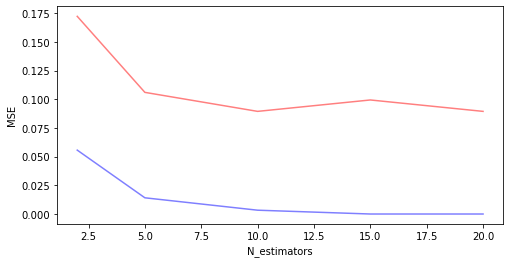

In [167]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(bas_X_train, bas_X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [168]:
def rf_max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=8, max_leaf_nodes =i, random_state=10).fit(bas_X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(bas_X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(bas_X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

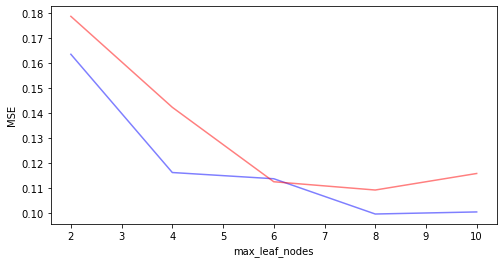

In [169]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [170]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 6, max_leaf_nodes = 5, random_state = 10).fit(bas_X_train, y_train)

In [171]:
# Predicting the Test set results
rf_pred = rf.predict(bas_X_test)
rf_pred = (rf_pred > 0.6)
rf.score(bas_X_test,y_test)

0.8841059602649006

In [172]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_pred)
print(cm)

[[127  16]
 [ 19 140]]


In [173]:
Error_rate = (19+16)/(302)
Error_rate

0.11589403973509933

In [174]:
Se = 140/(140+19)
Se

0.8805031446540881

In [175]:
Sp = 127/(127+16)
Sp

0.8881118881118881

RF: ROC AUC=0.940


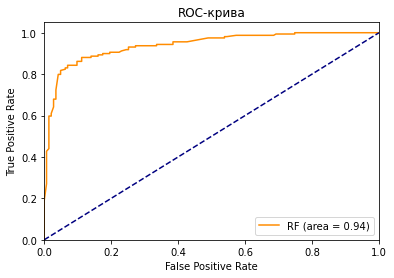

In [176]:
rf_probs = rf.predict_proba(bas_X_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('RF: ROC AUC=%.3f' % (rf_auc))
fpr, tpr, treshold = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='RF (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

Random Forest на усіх змінних

In [177]:
def rf_best_n_estimator(X_train, X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("N_estimators")

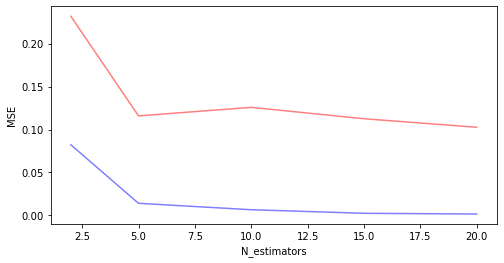

In [178]:
# The optimal number of trees 
from sklearn.ensemble import RandomForestClassifier    
rf_best_n_estimator(X_train, X_test, y_train, y_test, [2, 5, 10, 15, 20])

In [179]:
def rf_max_leaf_nodes(bas_X_train, bas_X_test, y_train, y_test, n):
    mse_train = []
    mse_test = []
    for i in n:
        rf = RandomForestClassifier(n_estimators=5, max_leaf_nodes =i, random_state=10).fit(X_train, y_train)
        mse_train.append(mean_squared_error(y_train, rf.predict(X_train)))
        mse_test.append(mean_squared_error(y_test, rf.predict(X_test)))
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(n, mse_train, alpha=0.5, color='blue', label='train')
    ax.plot(n, mse_test, alpha=0.5, color='red', label='test')
    ax.set_ylabel("MSE")
    ax.set_xlabel("max_leaf_nodes")

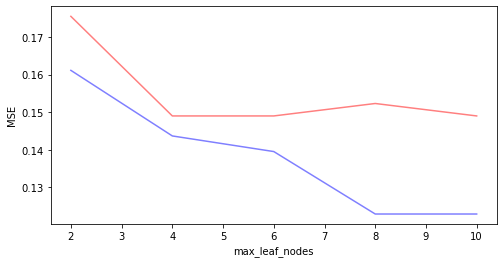

In [180]:
# The optimal number of max_leaf_nodes
rf_max_leaf_nodes(X_train, X_test, y_train, y_test, [2, 4, 6, 8, 10])

In [181]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 3, max_leaf_nodes = 3, random_state = 10).fit(X_train, y_train)

In [182]:
# Predicting the Test set results
rf_pred = rf.predict(X_test)
rf_pred = (rf_pred > 0.6)
rf.score(X_test,y_test)

0.890728476821192

In [183]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf_pred)
print(cm)

[[134   9]
 [ 24 135]]


In [184]:
Error_rate = (24+9)/(302)
Error_rate

0.10927152317880795

In [185]:
Se = 135/(135+24)
Se

0.8490566037735849

In [186]:
Sp = 134/(134+9)
Sp

0.9370629370629371

RF: ROC AUC=0.925


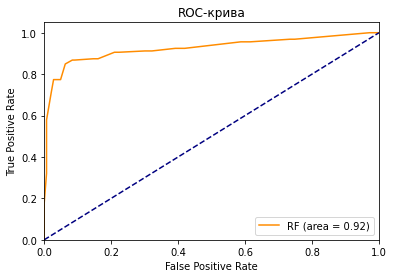

In [187]:
rf_probs = rf.predict_proba(X_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('RF: ROC AUC=%.3f' % (rf_auc))
fpr, tpr, treshold = roc_curve(y_test, rf_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='RF (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# Classification Neural Network

Classification Neural Network на усіх змінних

In [746]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [754]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(output_dim = 33, init = 'uniform', activation = 'relu', input_dim =33))

# Adding the output layer
cnn.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=33, units=33, kernel_initializer="uniform")`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [755]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 8, nb_epoch = 80, validation_data=(X_test, y_test))

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1204 samples, validate on 302 samples
Epoch 1/80
1204/1204 [==============================] - 1s 577us/step - loss: 0.6121 - accuracy: 0.7832 - val_loss: 0.4944 - val_accuracy: 0.7947
Epoch 2/80
1204/1204 [==============================] - 0s 319us/step - loss: 0.3997 - accuracy: 0.8480 - val_loss: 0.3580 - val_accuracy: 0.8742
Epoch 3/80
1204/1204 [==============================] - 0s 326us/step - loss: 0.3323 - accuracy: 0.8688 - val_loss: 0.3372 - val_accuracy: 0.8874
Epoch 4/80
1204/1204 [==============================] - 0s 331us/step - loss: 0.3132 - accuracy: 0.8771 - val_loss: 0.3261 - val_accuracy: 0.8907
Epoch 5/80
1204/1204 [==============================] - 0s 335us/step - loss: 0.2999 - accuracy: 0.8829 - val_loss: 0.3257 - val_accuracy: 0.8841
Epoch 6/80
1204/1204 [==============================] - 0s 345us/step - loss: 0.2913 - accuracy: 0.8837 - val_loss: 0.3248 - val_accuracy: 0.8874
Epoch 7/80
1204/1204 [==============================] - 0s 390us/step - loss:

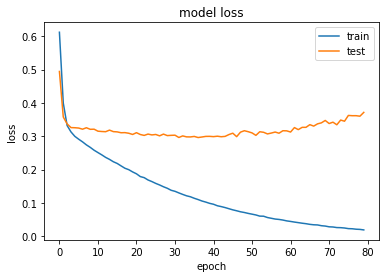

In [756]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [792]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.65)

In [793]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[137   6]
 [ 19 140]]


In [794]:
Accurary_rate = (140+137)/(302)
Accurary_rate

0.9172185430463576

In [795]:
Error_rate = (19+6)/(302)
Error_rate

0.08278145695364239

In [796]:
Se = 140/(140+19)
Se

0.8805031446540881

In [797]:
Sp = 137/(137+6)
Sp

0.958041958041958

KNN: ROC AUC=0.950


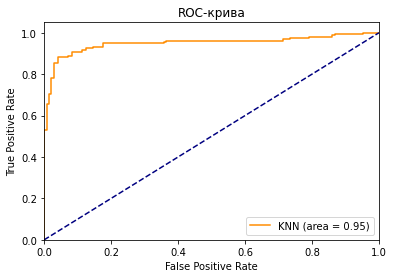

In [798]:
cnn_probs = cnn.predict_proba(X_test)
cnn_probs = cnn_probs[:, -1]
cnn_auc = roc_auc_score(y_test, cnn_probs)
print('CNN: ROC AUC=%.3f' % (cnn_auc))
fpr, tpr, treshold = roc_curve(y_test, cnn_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='CNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

Classification Neural Network на значущих змінних

In [853]:
# Initialising the ANN
cnn1 = Sequential()

# Adding the input layer and the first hidden layer
cnn1.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu', input_dim = 11))

# Adding the output layer
cnn1.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
cnn1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=10, kernel_initializer="uniform")`
  """
C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [854]:
# Fitting the ANN to the Training set
history = cnn1.fit(bas_X_train, y_train, batch_size = 8, nb_epoch = 100, validation_data=(bas_X_test, y_test))

C:\Users\User\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1204 samples, validate on 302 samples
Epoch 1/100
1204/1204 [==============================] - 1s 634us/step - loss: 0.6626 - accuracy: 0.8032 - val_loss: 0.5880 - val_accuracy: 0.8543
Epoch 2/100
1204/1204 [==============================] - 0s 333us/step - loss: 0.4900 - accuracy: 0.8563 - val_loss: 0.4118 - val_accuracy: 0.8642
Epoch 3/100
1204/1204 [==============================] - 0s 291us/step - loss: 0.3769 - accuracy: 0.8663 - val_loss: 0.3510 - val_accuracy: 0.8709
Epoch 4/100
1204/1204 [==============================] - 0s 326us/step - loss: 0.3452 - accuracy: 0.8679 - val_loss: 0.3336 - val_accuracy: 0.8808
Epoch 5/100
1204/1204 [==============================] - 0s 359us/step - loss: 0.3357 - accuracy: 0.8713 - val_loss: 0.3266 - val_accuracy: 0.8775
Epoch 6/100
1204/1204 [==============================] - 0s 317us/step - loss: 0.3308 - accuracy: 0.8721 - val_loss: 0.3233 - val_accuracy: 0.8841
Epoch 7/100
1204/1204 [==============================] - 0s 316us/step 

Epoch 56/100
1204/1204 [==============================] - 0s 327us/step - loss: 0.2811 - accuracy: 0.8929 - val_loss: 0.3089 - val_accuracy: 0.8841
Epoch 57/100
1204/1204 [==============================] - 0s 292us/step - loss: 0.2809 - accuracy: 0.8920 - val_loss: 0.3087 - val_accuracy: 0.8841
Epoch 58/100
1204/1204 [==============================] - 0s 310us/step - loss: 0.2798 - accuracy: 0.8912 - val_loss: 0.3094 - val_accuracy: 0.8874
Epoch 59/100
1204/1204 [==============================] - 0s 311us/step - loss: 0.2791 - accuracy: 0.8904 - val_loss: 0.3081 - val_accuracy: 0.8874
Epoch 60/100
1204/1204 [==============================] - 0s 291us/step - loss: 0.2783 - accuracy: 0.8929 - val_loss: 0.3074 - val_accuracy: 0.8874
Epoch 61/100
1204/1204 [==============================] - 0s 328us/step - loss: 0.2780 - accuracy: 0.8920 - val_loss: 0.3072 - val_accuracy: 0.8874
Epoch 62/100
1204/1204 [==============================] - 0s 301us/step - loss: 0.2775 - accuracy: 0.8904 - val_

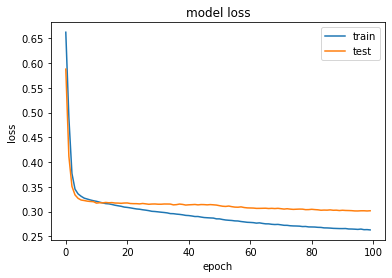

In [855]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [878]:
# Predicting the Test set results
y_pred = cnn1.predict(bas_X_test)
y_pred = (y_pred > 0.66)

In [879]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[136   7]
 [ 26 133]]


In [880]:
Accurary_rate = (133+136)/(302)
Accurary_rate

0.890728476821192

In [881]:
Error_rate = (26+7)/(302)
Error_rate

0.10927152317880795

In [883]:
Se = 133/(133+26)
Se

0.8364779874213837

In [884]:
Sp = 136/(136+7)
Sp

0.951048951048951

KNN: ROC AUC=0.939


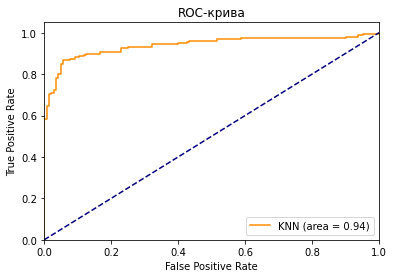

In [885]:
cnn1_probs = cnn1.predict_proba(bas_X_test)
cnn1_probs = cnn1_probs[:, -1]
cnn1_auc = roc_auc_score(y_test, cnn1_probs)
print('СNN: ROC AUC=%.3f' % (cnn1_auc))
fpr, tpr, treshold = roc_curve(y_test, cnn1_probs)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         label='СNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()

# КЛАСТЕРИЗАЦИЯ

# K-Means Clustering

In [1689]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [1690]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
pd.DataFrame(df, columns = ['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported']).round()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
996,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


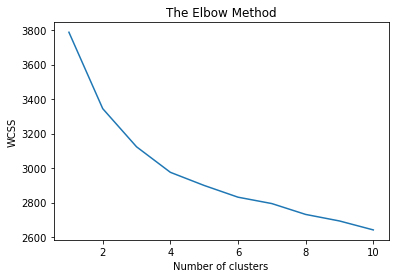

In [1691]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

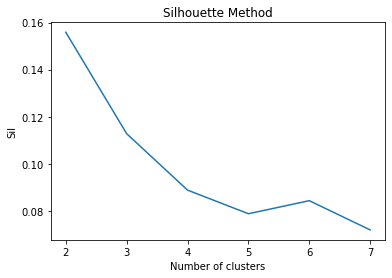

2:0.1558960399096853
3:0.1127699878473283
4:0.08878331596498931
5:0.07873745354773284
6:0.08428776767860532
7:0.07186037029104264


In [1692]:
# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 8):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 8), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [1693]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters = 3, random_state = 0).fit(df)
pd.DataFrame(kms.cluster_centers_, columns = ['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported']).round()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0


In [1698]:
# Less features
X = df[:, [5,10,15,24,26,29,30,31,32,33]]

In [1701]:
# Fitting K-Means to the dataset
km = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(X)
kms = KMeans(n_clusters = 3, random_state = 0).fit(X)
pd.DataFrame(kms.cluster_centers_, columns = ['policy_annual_premium','insured_hobbies','collision_type','witnesses',
                                              'total_claim_amount',
                                              'vehicle_claim', 'auto_make', 'auto_model','auto_year', 'fraud_reported']).round()

,policy_annual_premium,insured_hobbies,collision_type,witnesses,total_claim_amount,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


# SOM

In [1742]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(10, 20, X, PBC=True)
net.train(0.01, 10000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


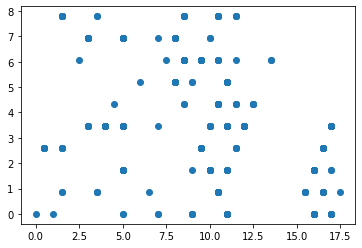

In [1739]:
prj=np.array(net.project(X))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [1743]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(prj)

In [1744]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km,kmeans.labels_)

0.7580864292546114

# Hierarchical Clustering

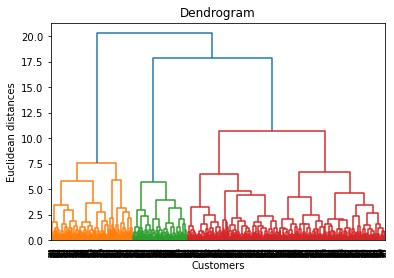

In [1745]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [1746]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

In [1747]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,kmeans.labels_)

0.6456685558729993

In [1748]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc,km)

0.8543623853497468